In [68]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import nltk
import time

In [5]:
df=pd.read_csv('twitter_training.csv',header=None)
df.columns = ['tweet_id', 'entity', 'sentiment', 'content']
df_val=pd.read_csv('twitter_validation.csv',header=None)
df_val.columns = ['tweet_id', 'entity', 'sentiment', 'content']
df.head()

,tweet_id,entity,sentiment,content
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [8]:
df.describe()

,tweet_id
count,74682.000000
mean,6432.586165
std,3740.427870
min,1.000000
25%,3195.000000
50%,6422.000000
75%,9601.000000
max,13200.000000


In [14]:
df_val

,tweet_id,entity,sentiment,content
0,3364,Facebook,Irrelevant,I mentioned on Facebook that I was struggling ...
1,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
3,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,4433,Google,Neutral,Now the President is slapping Americans in the...
...,...,...,...,...
995,4891,GrandTheftAuto(GTA),Irrelevant,⭐️ Toronto is the arts and culture capital of ...
996,4359,CS-GO,Irrelevant,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...
997,2652,Borderlands,Positive,Today sucked so it’s time to drink wine n play...
998,8069,Microsoft,Positive,Bought a fraction of Microsoft today. Small wins.


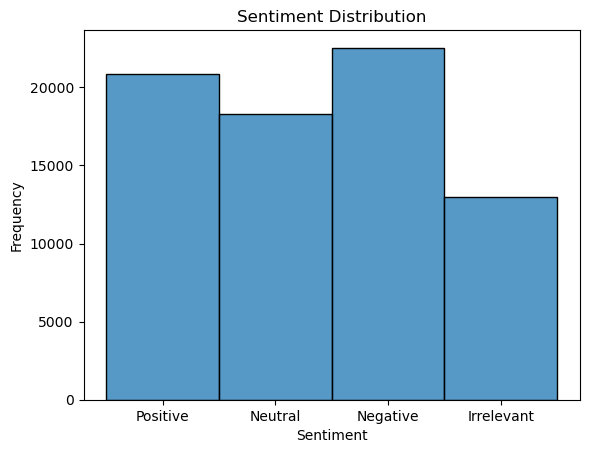

In [16]:
# Plot histogram for a categorical column
sns.histplot(df['sentiment'], discrete=True)
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Frequency')
plt.show()


In [18]:
df.isna().sum()

tweet_id       0
entity         0
sentiment      0
content      686
dtype: int64

In [20]:
df.dropna(inplace=True)

In [22]:
df=df.drop_duplicates(subset=['content'])

In [26]:
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/zizhenzhang/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/zizhenzhang/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/zizhenzhang/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [28]:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    text = re.sub(r'<.*?>', '', text)
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = text.lower()
    words = word_tokenize(text)
    words = [word for word in words if word not in stop_words]
    words = [lemmatizer.lemmatize(word) for word in words]
    return ' '.join(words)

df['clean_text'] = df['content'].apply(clean_text)

/var/folders/7s/qc0xm5j967bfhqw3r81rx_v80000gn/T/ipykernel_40520/2637265009.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['clean_text'] = df['content'].apply(clean_text)


In [29]:
df_val['clean_text'] = df_val['content'].apply(clean_text)
df_val

,tweet_id,entity,sentiment,content,clean_text
0,3364,Facebook,Irrelevant,I mentioned on Facebook that I was struggling ...,mentioned facebook struggling motivation go ru...
1,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...,bbc news amazon bos jeff bezos reject claim co...
2,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...,microsoft pay word function poorly samsungus c...
3,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,...",csgo matchmaking full closet hacking truly awf...
4,4433,Google,Neutral,Now the President is slapping Americans in the...,president slapping american face really commit...
...,...,...,...,...,...
995,4891,GrandTheftAuto(GTA),Irrelevant,⭐️ Toronto is the arts and culture capital of ...,toronto art culture capital canada wonder want...
996,4359,CS-GO,Irrelevant,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...,actually good move tot bring viewer one people...
997,2652,Borderlands,Positive,Today sucked so it’s time to drink wine n play...,today sucked time drink wine n play borderland...
998,8069,Microsoft,Positive,Bought a fraction of Microsoft today. Small wins.,bought fraction microsoft today small win


In [46]:
X = df['clean_text']  
y = df['sentiment']    
X_test=df_val['clean_text']
y_test= df_val['sentiment']    

In [64]:
tfidf_vectorizer = TfidfVectorizer(max_features=20000)  

X_train_tfidf = tfidf_vectorizer.fit_transform(X)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [70]:
model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=300)
start_time=time.time()
model.fit(X_train_tfidf, y)
train_time=time.time()-start_time
y_pred = model.predict(X_test_tfidf)
accuracy = accuracy_score(y_test, y_pred)
print("Results:")
print(classification_report(y_test, y_pred))
print(train_time)

Results:
              precision    recall  f1-score   support

  Irrelevant       0.90      0.90      0.90       172
    Negative       0.87      0.95      0.91       266
     Neutral       0.94      0.87      0.90       285
    Positive       0.92      0.90      0.91       277

    accuracy                           0.91      1000
   macro avg       0.90      0.91      0.90      1000
weighted avg       0.91      0.91      0.90      1000

1.7227771282196045


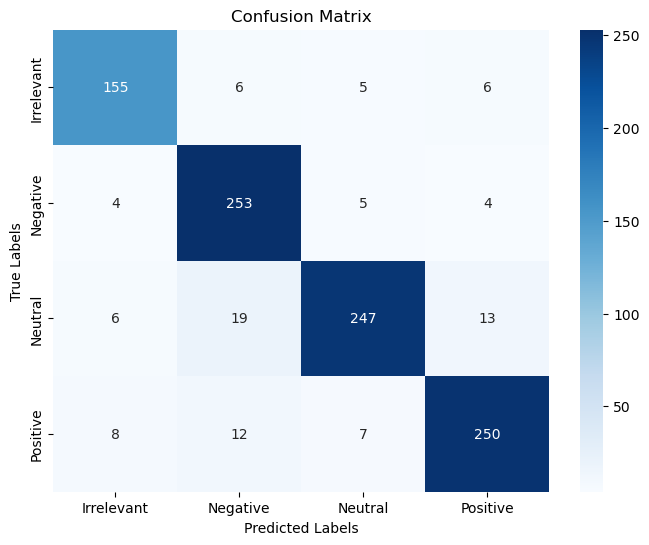

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Irrelevant', 'Negative', 'Neutral', 'Positive'], yticklabels=['Irrelevant', 'Negative', 'Neutral', 'Positive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

plt.show()


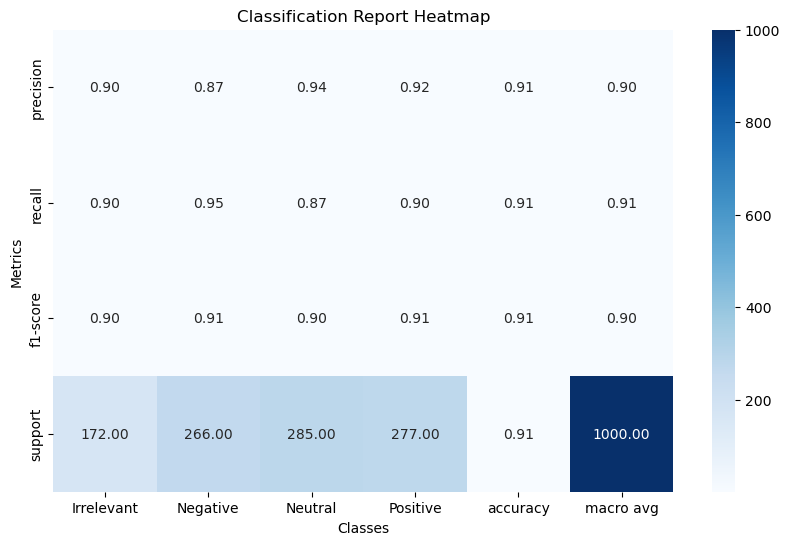

In [166]:
from sklearn.metrics import classification_report
import pandas as pd
import numpy as np

report = classification_report(y_test, y_pred, output_dict=True)

report_df = pd.DataFrame(report).transpose()

plt.figure(figsize=(10, 6))
sns.heatmap(report_df.iloc[:-1, :].T, annot=True, cmap='Blues', fmt='.2f')
plt.title('Classification Report Heatmap')
plt.ylabel('Metrics')
plt.xlabel('Classes')
plt.show()


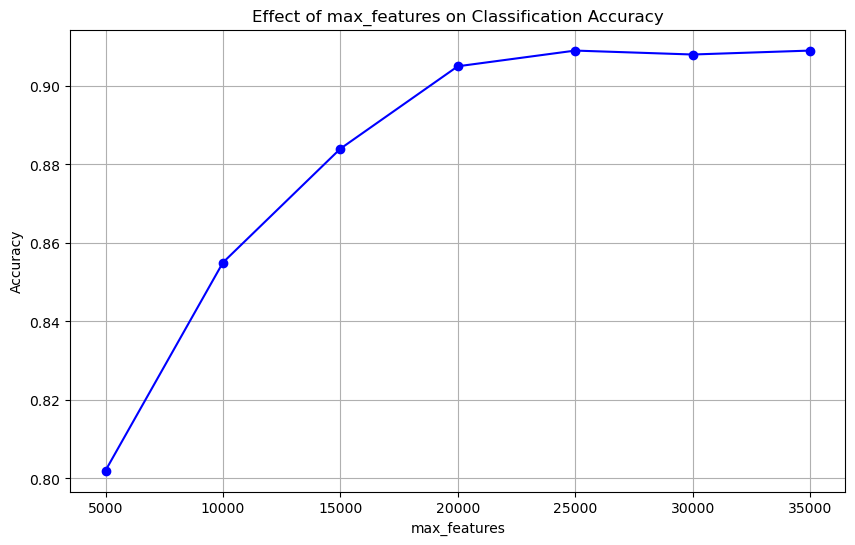

In [62]:
accuracies=[]
max_features_range = [5000, 10000, 15000, 20000, 25000, 30000,35000]
for max_feature in max_features_range:
    tfidf_vectorizer3 = TfidfVectorizer(max_features=max_feature)  
    
    X_train_tfidf3 = tfidf_vectorizer3.fit_transform(X)
    X_test_tfidf3 = tfidf_vectorizer3.transform(X_test)
    
    model.fit(X_train_tfidf3, y)
    
    y_pred = model.predict(X_test_tfidf3)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

plt.figure(figsize=(10, 6))
plt.plot(max_features_range, accuracies, marker='o', linestyle='-', color='b')
plt.title('Effect of max_features on Classification Accuracy')
plt.xlabel('max_features')
plt.ylabel('Accuracy')
plt.xticks(max_features_range)
plt.grid()
plt.savefig('feature_accuracy.png', dpi=300, bbox_inches='tight')  # Saves as a high-quality PNG
plt.show()

In [73]:
svm = SVC(kernel='linear') 
start_time=time.time()
svm.fit(X_train_tfidf, y)
train_time=time.time()-start_time

y_pred_svm = svm.predict(X_test_tfidf)
print("Results:")
print(classification_report(y_test, y_pred_svm))
print(train_time)

Results:
              precision    recall  f1-score   support

  Irrelevant       0.93      0.92      0.93       172
    Negative       0.91      0.96      0.93       266
     Neutral       0.95      0.90      0.92       285
    Positive       0.92      0.93      0.92       277

    accuracy                           0.93      1000
   macro avg       0.93      0.93      0.93      1000
weighted avg       0.93      0.93      0.93      1000

367.5842730998993


In [77]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)  
start_time=time.time()
rf.fit(X_train_tfidf, y)
train_time=time.time()-start_time

y_pred_rf = rf.predict(X_test_tfidf)

print("Accuracy Score:", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))
print(train_time)

Accuracy Score: 0.968

Classification Report:
               precision    recall  f1-score   support

  Irrelevant       0.98      0.97      0.98       172
    Negative       0.96      0.97      0.96       266
     Neutral       0.97      0.95      0.96       285
    Positive       0.96      0.98      0.97       277

    accuracy                           0.97      1000
   macro avg       0.97      0.97      0.97      1000
weighted avg       0.97      0.97      0.97      1000

43.908339977264404
